Linear Regression Using Numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing data

In [3]:
data = pd.read_csv('../data/weight_height_data.csv',index_col='Index')
#data = data.sample(n=1000, random_state=1)
X = data["Height(Inches)"].values
y = data["Weight(Pounds)"].values

Defining the linear model

$$\hat{y} = \vec{\beta} \vec{X} + \alpha$$

Objective Function: 

$$\vec{\hat{\beta}}=\min_{\vec{\hat{\beta}}} L(D, \vec{\beta}) =\min_{\vec{\hat{\beta}}} \sum_{i=1}^{n}{(\hat{\beta} .\vec{x_i} - y_i)^2}$$
$$L(D,\vec{\beta})=||X\vec{\beta} - Y||^2$$
$$=(X\vec{\beta}-y)^T(X\vec{\beta}-Y)$$
$$=Y^TY-Y^TX\vec{\beta}-\vec{\beta}^TX^TY+\vec{\beta}^TX^TX\vec{\beta}$$

Get gradient w.r.t. $\vec{\beta}$

$$\frac{\partial{L(D,\vec{\beta})}}{\partial{\vec{\beta}}} = \frac{\partial{(Y^TY-Y^TX\vec{\beta}-\vec{\beta}^TX^TY+\vec{\beta}X^TX\vec{\beta}})}{\partial{\vec{\beta}}}$$
$$= -2Y^TX+2\vec{\beta}^TX^TX$$
$$=-2Y^TX+2\vec{\beta}+2\vec{\beta}^TX^TX$$

Set gradient to zero.

$$=-2Y^TX+2\vec{\beta}^TX^TX=0$$
$$Y^TX=\vec{\beta}^TX^TX$$
$$X^TY=X^TX\vec{\beta}$$
$$\vec{\beta}=(X^TX)^{-1}X^TY$$

Optimize the parameters $\vec{\beta}$ and $\alpha$ using ordinary least squares (OLS)

In this case, the first element of $\vec{\beta}$ is $\alpha$. We also concatenate a ones vector ($\vec{1}$) to the beginning of $\vec{X}$ to account for the intercept $\alpha$.



$$\hat{\beta} = (\vec{X}^{T} \vec{X})^{-1} \vec{X}^{T} \vec{y}$$

In [4]:
def ols(X, y):
    X = np.array([np.ones(len(X)),X]).T
    betas = np.linalg.pinv(X.T @ X) @ X.T @ y
    return betas

Root Mean Square Error

$$rmse(\hat{y},y)=\sqrt{\frac{1}{n}\sum_{i}^{n}{(\hat{y}-y)}^2}$$

In [5]:
def mse(y_hat, y):
    return np.mean((y_hat - y)**2)

In [6]:
def rmse(y_hat, y):
    return np.sqrt(mse(y_hat,y))

In [7]:
betas = ols(X,y)
betas

array([-82.57574307,   3.08347645])

In [8]:
yhat = np.array([np.ones(len(X)),X]).T @ betas

In [9]:
rmse(yhat,y)

10.079113675632819

In [10]:
pd.DataFrame([yhat,y]).T

,0,1
0,120.265544,112.9925
1,137.939722,136.4873
2,131.413637,153.0269
3,127.768536,142.3354
4,126.446372,144.2971
...,...,...
24995,131.732499,118.0312
24996,116.457296,120.1932
24997,116.920712,118.2655
24998,125.648893,132.2682


In [11]:
mse(yhat,y)

101.58853248632849

In [25]:
betas

array([-82.57574307,   3.08347645])

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X.reshape(-1,1),y)

In [23]:
print(model.coef_)

print(model.intercept_)

[3.08347645]
-82.57574306454056


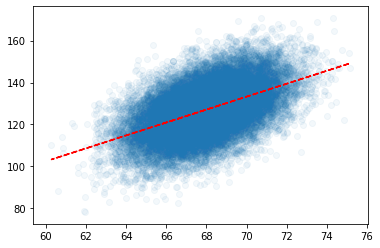

In [11]:
plt.plot(X,yhat, 'r--')
plt.scatter(X,y, alpha=0.05)